In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("Xtime/X_train.parquet")
X_test = pd.read_parquet("Xtime/X_test.parquet")
Y_train = pd.read_parquet("Ytime/Y_train.parquet")
Y_test = pd.read_parquet("Ytime/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
Complete = pd.read_parquet("time_dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'kernel': [RationalQuadratic() + WhiteKernel(), DotProduct() + WhiteKernel(),
                         DotProduct() + RationalQuadratic(), RBF() + WhiteKernel(),
                         RBF() + DotProduct(), RBF() + RationalQuadratic()]} 

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [6]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 11.895063638687134 s, score: 0.9986746913445835
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 5.911665916442871 s, score: 0.9981970273927689
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6
Tiempo de entrenamiento: 0.6836659908294678 s, score: -1085.7878847073416
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 1.6649775505065918 s, score: 0.9986746911274333
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6
Tiempo de entrenamiento: 0.41437292098999023 s, score: -1784.187951195064
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6
Tiempo de entrenamiento: 12.36269474029541 s, score: 0.9970885228416297
Best Score: 0.9986746913445835
Bes

In [7]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 12.002766132354736 s, score: 0.9981879890727687
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 5.931595802307129 s, score: 0.9981829937635879
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 17.474091291427612 s, score: 0.9982494842282096
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 1.7718737125396729 s, score: 0.998188008240832
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 9.956424713134766 s, score: 0.8799633674758187
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 23.856892108917236 s, score: 0.9979733098079931
Best Score: 0.9982494842282096
Best Parameters: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [8]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y3_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 6.923926830291748 s, score: 0.9986353935731553
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 5.185832738876343 s, score: 0.9956356059018194
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6
Tiempo de entrenamiento: 0.5485985279083252 s, score: -84.9876482416457
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 1.8802640438079834 s, score: 0.9986353929831603
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6
Tiempo de entrenamiento: 0.35692787170410156 s, score: -447.7085650120003
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6
Tiempo de entrenamiento: 17.263347148895264 s, score: 0.9976888786774992
Best Score: 0.9986353935731553
Best 

In [9]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y4_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 10.816605567932129 s, score: 0.9975165692800055
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 6.349802494049072 s, score: 0.9948127132775723
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 22.593512773513794 s, score: 0.9901804276609699
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 2.203444004058838 s, score: 0.9975165674890556
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6
Tiempo de entrenamiento: 0.39203381538391113 s, score: -45.6276488006152
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 18.445449829101562 s, score: 0.9958606402907981
Best Score: 0.9975165692800055
Best Parameters: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}


In [10]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y5_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 6.363586664199829 s, score: 0.9930308773958785
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 6.731028318405151 s, score: 0.9927199154815478
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 19.820308208465576 s, score: 0.9881806719817684
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 2.055767297744751 s, score: 0.9930300548095179
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 16.04645562171936 s, score: 0.9707471061732268
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 27.25486183166504 s, score: 0.9892132483873705
Best Score: 0.9930308773958785
Best Parameters: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}


In [6]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 30.327722549438477 s, score: 0.9982258029718116
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 10.563440561294556 s, score: 0.9959258675140048
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6
Tiempo de entrenamiento: 0.987393856048584 s, score: -1998.9853336492797
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 4.024611711502075 s, score: 0.9982258007217792
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6
Tiempo de entrenamiento: 0.8261098861694336 s, score: -4318.446784004607
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 48.49882984161377 s, score: 0.9972889227749592
Best Score: 0.9982258029718116
Best Parameters: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


## Test for each year

In [12]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

0.004196120824179203

In [13]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

0.004119739383691218

In [14]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

0.004531323331161684

In [15]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

0.004429772260135994

## One concrete example

In [16]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[ 59913.8589898 , 136852.21587773,   2761.99359368,
           766.53237742,   2346.61557682,  49664.88775994,
          1992.        ]])

In [17]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[ 57900., 136649.,   3206.,    821.,   2385.,  49816.,   2014.]])

## Probamos con España

In [7]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [19]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

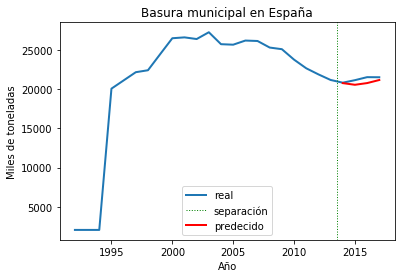

In [20]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [21]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

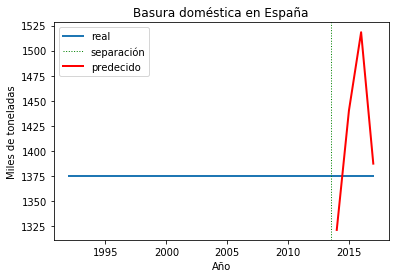

In [22]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [23]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

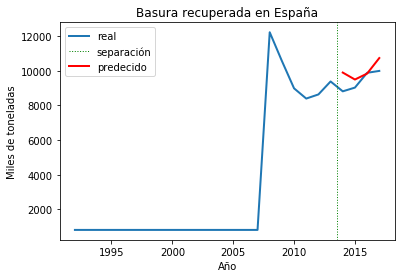

In [24]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [25]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

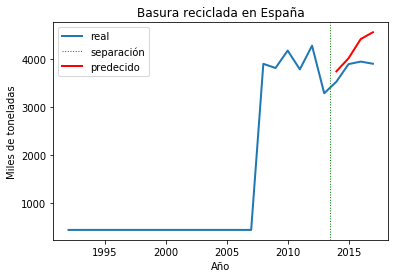

In [26]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [27]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

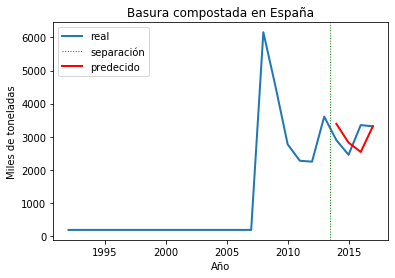

In [28]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [10]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf6.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

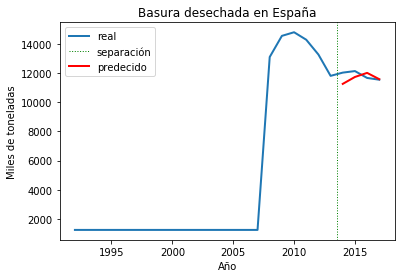

In [11]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura desechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()